In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from common.preprocessor import load_data
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = load_data('data', 'Commodity Prices Monthly.csv')
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


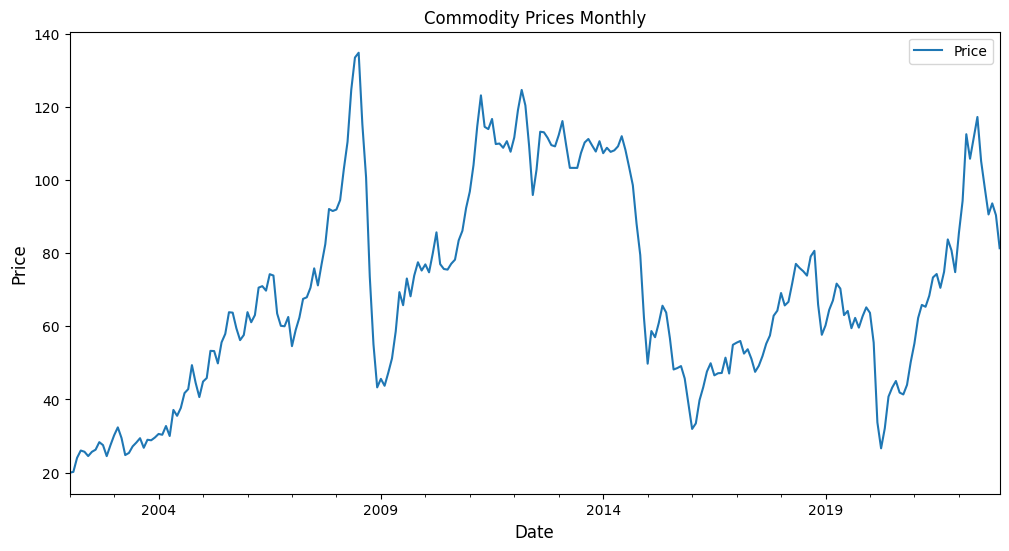

In [13]:
data.plot(y='Price', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [18]:
# set the train and test data with start dates
train_start_date = '2002-01-01'
test_start_date = '2019-01-01'

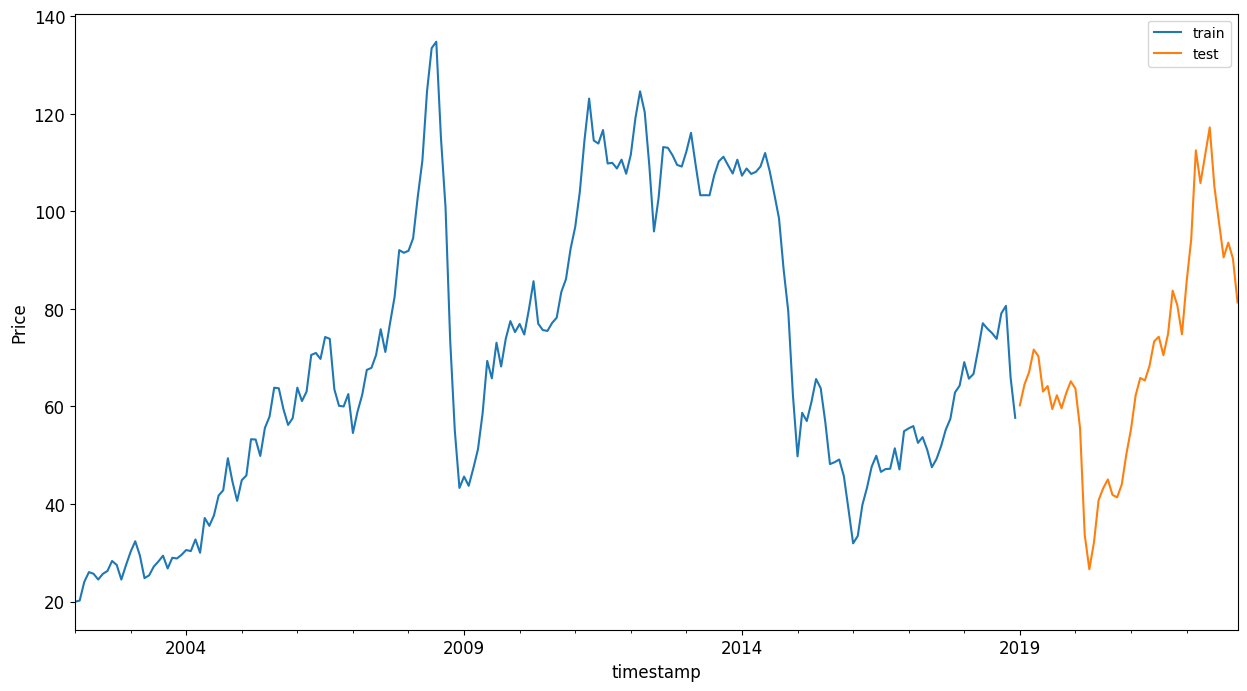

In [19]:
# visualize the train and test data
data[(data.index < test_start_date) & (data.index >= train_start_date)][['Price']].rename(columns={'Price':'train'}) \
    .join(data[test_start_date:][['Price']].rename(columns={'Price':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [20]:
# set the train and test data and print the dimensions of it
train = data.copy()[(data.index >= train_start_date) & (data.index < test_start_date)][['Price']]
test = data.copy()[data.index >= test_start_date][['Price']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (204, 1)
Test data shape:  (48, 1)


In [22]:
# Prepare data for training
scaler = MinMaxScaler()
scaled_train = train.copy()
scaled_test = test.copy()
scaled_train['Price'] = scaler.fit_transform(scaled_train[['Price']])
print(f'Scaled Training Set: {scaled_train.shape}\nScaled Testing Set {scaled_test.shape}')

Scaled Training Set: (204, 1)
Scaled Testing Set (48, 1)


In [23]:
# Convert to numpy arrays
scaled_train_data = scaled_train.values
scaled_test_data = scaled_test.values

In [24]:
timesteps = 5

In [25]:
scaled_train_data_timesteps=np.array([[j for j in scaled_train_data[i:i+timesteps]] for i in range(0,len(scaled_train_data)-timesteps+1)])[:,:,0]
scaled_train_data_timesteps.shape

(200, 5)

In [26]:
scaled_test_data_timesteps=np.array([[j for j in scaled_test_data[i:i+timesteps]] for i in range(0,len(scaled_test_data)-timesteps+1)])[:,:,0]
scaled_test_data_timesteps.shape

(44, 5)

In [27]:
x_train, y_train = scaled_train_data_timesteps[:,:timesteps-1],scaled_train_data_timesteps[:,[timesteps-1]]
x_test, y_test = scaled_test_data_timesteps[:,:timesteps-1],scaled_test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(200, 4) (200, 1)
(44, 4) (44, 1)


In [28]:
# check 
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [29]:
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [30]:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=10, epsilon=0.05, gamma=0.5)

In [31]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(200, 1) (44, 1)


In [32]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

200 44


In [33]:
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

200 44


In [34]:
train_timestamps = data[(data.index < test_start_date) & (data.index >= train_start_date)].index[timesteps-1:]
test_timestamps = data[test_start_date:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

200 44


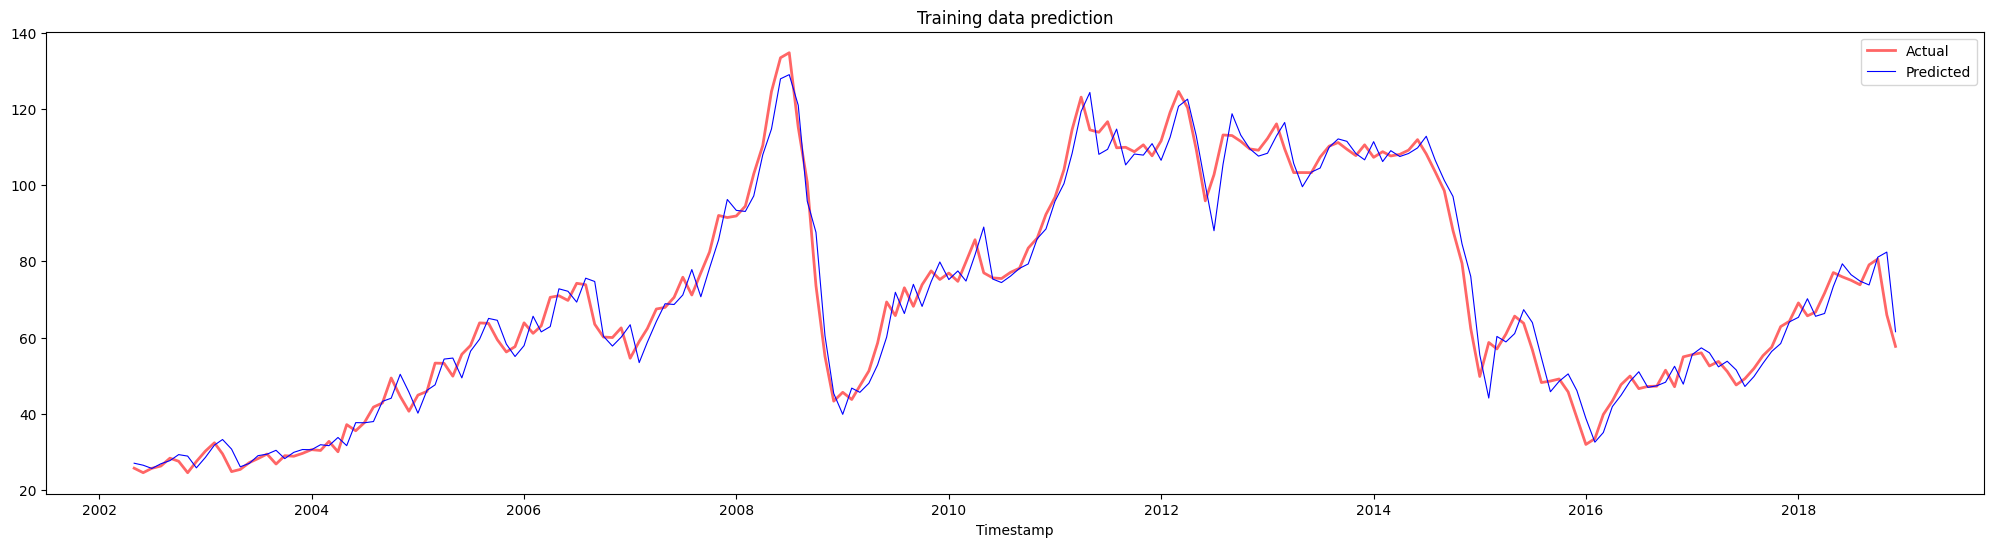

In [35]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_train_pred,y_train)
mape

0.05742006914810534

In [38]:
y_test_pred

array([[41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142],
       [41.3097142]])

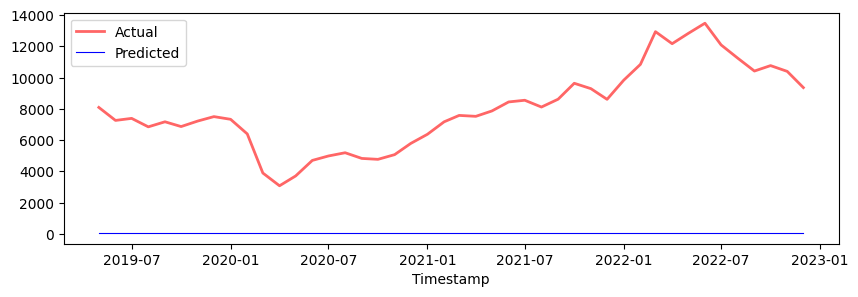

In [39]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [40]:
## check performance on full dataset

In [41]:
# Extracting load values as numpy array
full_data = data.copy().values

# Scaling
full_data = scaler.transform(full_data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in full_data[i:i+timesteps]] for i in range(0,len(full_data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)

Tensor shape:  (248, 5)
X shape:  (248, 4) 
Y shape:  (248, 1)


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [42]:
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)

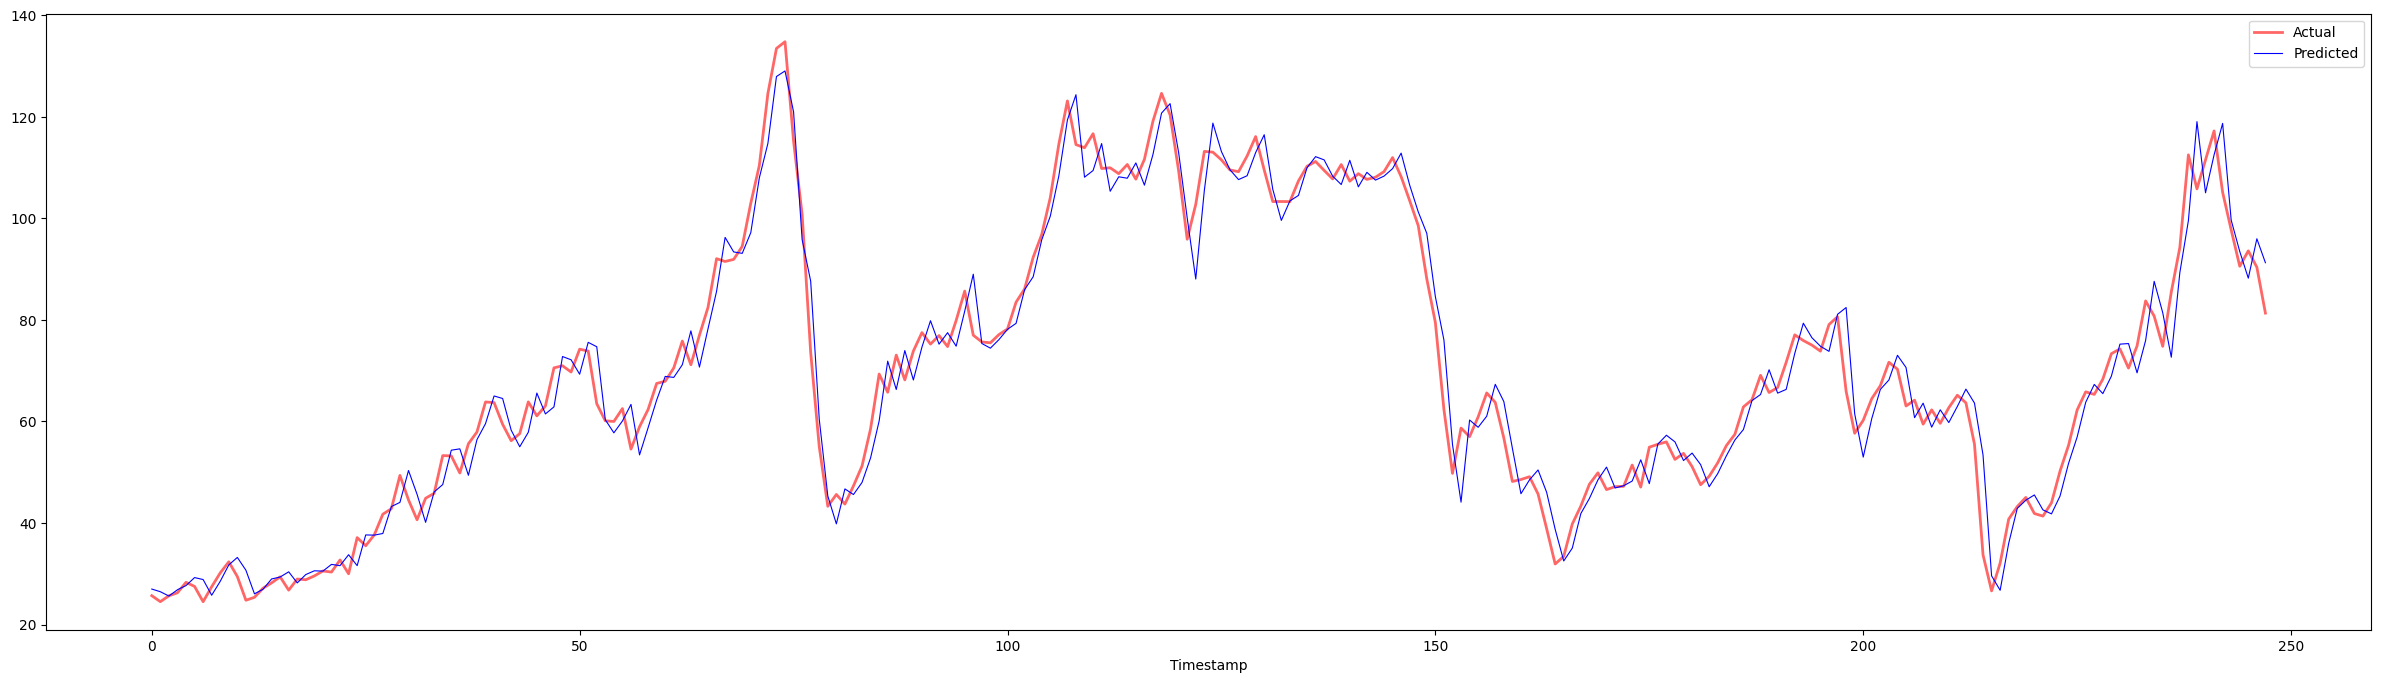

In [43]:
plt.figure(figsize=(30,8))
plt.plot(Y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error 
print(f'MAE : {mean_absolute_error(Y, Y_pred)}') 

MAE : 3.980276005484283


In [45]:
print(f'MAPE : {mean_absolute_percentage_error(Y_pred,Y)}%')

MAPE : 0.06118944740677382%
